# Rf 6 0 9_Xychi 2Fit

Likelihood and minimization: setting up a chi^2 fit to an unbinned dataset with X,Y,err(Y) values (and optionally err(X) values)




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:00 AM.</small></i>

In [1]:
import ROOT
import math

Welcome to JupyROOT 6.18/03


Create dataset with X and Y values
-------------------------------------------------------------------

Make weighted XY dataset with asymmetric errors stored
The StoreError() argument is essential as it makes
the dataset store the error in addition to the values
of the observables. If errors on one or more observables
are asymmetric, can store the asymmetric error
using the StoreAsymError() argument

In [2]:
x = ROOT.RooRealVar("x", "x", -11, 11)
y = ROOT.RooRealVar("y", "y", -10, 200)
dxy = ROOT.RooDataSet("dxy", "dxy", ROOT.RooArgSet(
    x, y), ROOT.RooFit.StoreError(ROOT.RooArgSet(x, y)))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Fill an example dataset with X,err(X),Y,err(Y) values

In [3]:
for i in range(10):
    x.setVal(-10 + 2 * i)
    x.setError((0.5 / 1.) if (i < 5) else (1.0 / 1.))

    # Set Y value and error
    y.setVal(x.getVal() * x.getVal() + 4 * abs(ROOT.gRandom.Gaus()))
    y.setError(math.sqrt(y.getVal()))

    dxy.add(ROOT.RooArgSet(x, y))

Perform chi2 fit to X +/- dX and Y +/- dY values
---------------------------------------------------------------------------------------

Make fit function

In [4]:
a = ROOT.RooRealVar("a", "a", 0.0, -10, 10)
b = ROOT.RooRealVar("b", "b", 0.0, -100, 100)
f = ROOT.RooPolyVar(
    "f", "f", x, ROOT.RooArgList(
        b, a, ROOT.RooFit.RooConst(1)))

Plot dataset in X-Y interpretation

In [5]:
frame = x.frame(ROOT.RooFit.Title(
    "Chi^2 fit of function set of (X#pmdX,Y#pmdY) values"))
dxy.plotOnXY(frame, ROOT.RooFit.YVar(y))

<ROOT.RooPlot object ("frame_x_55e709a75fd0") at 0x55e709a75fd0>

Fit chi^2 using X and Y errors

In [6]:
f.chi2FitTo(dxy, ROOT.RooFit.YVar(y))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a            0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 b            0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
 **********
 **    3 **SET ERR           1
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1.98096 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Overlay fitted function

In [7]:
f.plotOn(frame)

<ROOT.RooPlot object ("frame_x_55e709a75fd0") at 0x55e709a75fd0>

Alternative: fit chi^2 integrating f(x) over ranges defined by X errors, rather
than taking point at center of bin

In [8]:
f.chi2FitTo(dxy, ROOT.RooFit.YVar(y), ROOT.RooFit.Integrate(ROOT.kTRUE))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a           -2.03094e-01  5.38426e-01   -1.00000e+01  1.00000e+01
     2 b            3.35422e-01  5.06297e-01   -1.00000e+02  1.00000e+02
 **********
 **   12 **SET ERR           1
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=169665 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX  

Overlay alternate fit result

In [9]:
f.plotOn(frame, ROOT.RooFit.LineStyle(ROOT.kDashed),
         ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_55e709a75fd0") at 0x55e709a75fd0>

Draw the plot on a canvas

In [10]:
c = ROOT.TCanvas("rf609_xychi2fit", "rf609_xychi2fit", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf609_xychi2fit.png")

Info in <TCanvas::Print>: png file rf609_xychi2fit.png has been created


Draw all canvases 

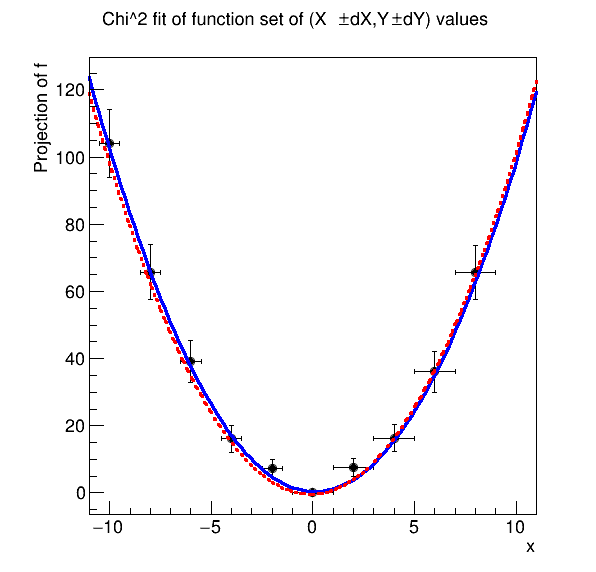

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()